In [1]:
import pandas as pd
import numpy as np
from scipy.special import expit
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")

np.random.seed(123)
n = 100
tuition = np.random.normal(1000, 300, n).round()
tablet = np.random.binomial(1, expit((tuition - tuition.mean()) / tuition.std())).astype(bool)
enem_score = np.random.normal(200 - 50 * tablet + 0.7 * tuition, 200)
enem_score = (enem_score - enem_score.min()) / enem_score.max()
enem_score *= 1000

data = pd.DataFrame(dict(enem_score=enem_score, Tuition=tuition, Tablet=tablet))

In [2]:
data

,enem_score,Tuition,Tablet
0,227.622953,674.0,False
1,219.079925,1299.0,True
2,400.889622,1085.0,False
3,122.761509,548.0,False
4,315.064276,826.0,False
...,...,...,...
95,451.019929,1309.0,True
96,113.288467,675.0,True
97,116.042782,591.0,False
98,266.238616,1114.0,True


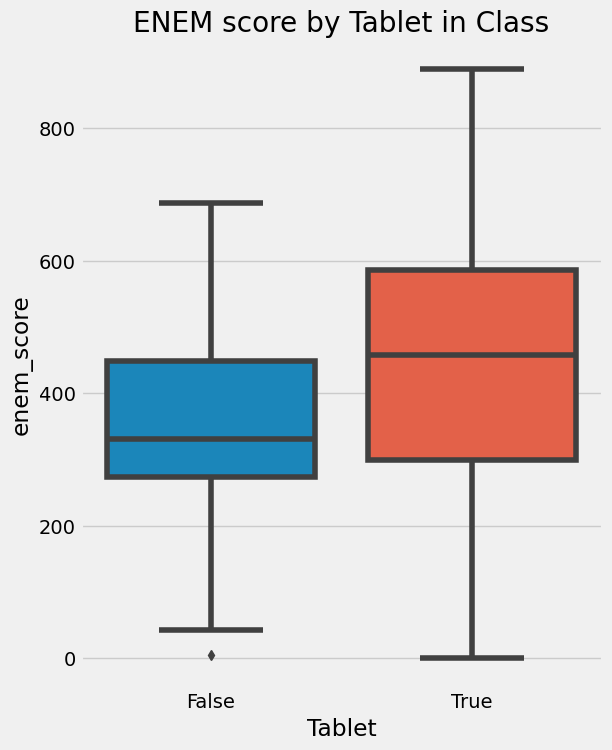

In [3]:
plt.figure(figsize=(6,8))
sns.boxplot(y="enem_score", x="Tablet", data=data).set_title('ENEM score by Tablet in Class')
plt.show()

In [4]:
pd.DataFrame(dict(
    i= [1,2,3,4],
    Y0=[500,600,800,700],
    Y1=[450,600,600,750],
    T= [0,0,1,1],
    Y= [500,600,600,750],
    TE=[-50,0,-200,50],
))

,i,Y0,Y1,T,Y,TE
0,1,500,450,0,500,-50
1,2,600,600,0,600,0
2,3,800,600,1,600,-200
3,4,700,750,1,750,50
